# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ilham Al Bukhori
- **Email:** ilhamalbukhori311006@gmail.com
- **ID Dicoding:** ILHAMALBUKHORI

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan jumlah penyewa setiap seasonnya?
- Bagaimana perbandingan penyewa sepeda ketika weekend/holiday dengan workingday?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Mengumpulkan data untuk dianalisis

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada dataset day_df bisa didapatkan info mengenai data penyewaan sepeda. Pada dataset terdapat info mengenai instant(indeks catatan), tanggal penyewaan, season(musim), tahun, bulan, weekday(hari dalam seminggu), weathersit(indesks baik buruknya cuaca pada hari tersebut, mulai dari 1,2,3, hingga 4). Lalu terdapat parameter kondisi keadaan dalam satu hari(temp, atemp, hum, dan windspeed). Lalu terdapat jumlah penyewa sepeda yang dibedakan menjadi 3  kolom, kolom casual berisi jumlah keseluruhan pengguna biasa dalam 1 hari, kolom registered berisi jumlah keseluruhan pengguna terdaftar dalam 1 hari, sementara kolom cnt berisi jumlah keseluruhan penyewa sepeda dalam 1 hari.


### Assessing Data

Menilai Data yang ada didalam day_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengecek missing value pada data_df

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Mencari jumlah data yang memiliki duplikat

In [ ]:
print("Jumlah duplikasi : ",day_df.duplicated().sum())

Jumlah duplikasi :  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Berdasarkan proses assessing data diatas, dataset day_df merupakan dataset bersih yang tidak terdapat missing value, duplicate value, inaccurate data, dan hal lain.
- Untuk memudahkan menarik kesimpulan berdasarkan pertanyaan, maka kita bisa menghapus kolom yang sekiranya tidak kita gunakan untuk menjawab pertanyaan. Kita bisa menghapus kolom temp, atemp, hum, dan windspeed.

### Cleaning Data

Proses Membersihkan data

In [63]:
del day_df['temp']
del day_df['atemp']
del day_df['windspeed']
del day_df['hum']

In [64]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,82,1518,1600


**Insight:**
- Menghapus kolom yang kurang berguna yaitu kolom temp, atemp, hum, windspeed
- Setelah proses cleaning data, table Dataframe menjadi lebih ringkas dengan hanya berisikan data yang dapat membantu menjawab pertanyaan.


## Exploratory Data Analysis (EDA)

### Explore day_df

---



Mengeksplor untuk mendapatkan wawasan baru terkait data.

In [65]:
day_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,1096.000000,4776.500000,5956.000000


In [66]:
day_df.groupby(by="season").agg({
    "casual" : "mean",
    "registered" : "mean"
})


,casual,registered
season,,
1,334.928177,2269.204420
2,1106.097826,3886.233696
3,1202.611702,4441.691489
4,729.112360,3999.050562


In [67]:
day_df.groupby(by="workingday").agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum",

})

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


In [68]:
day_df.groupby(by="weathersit").agg({
    "casual" : "mean",
    "registered" : "mean",
    "cnt" : "mean",
})

,casual,registered,cnt
weathersit,,,
1,964.030238,3912.755940,4876.786177
2,687.352227,3348.510121,4035.862348
3,185.476190,1617.809524,1803.285714


**Insight:**
- Dilihat dari tabel pertama, penyewa sepeda lebih banyak menyewa sepeda di **musim panas dan musim gugur** dibanding musim semi dan musim dingin. Faktor kondisi musim terutama musim panas dan gugur tentu menjadi penentu orang lebih banyak menyewa sepeda dibanding musim lainnya.
- Pada tabel kedua, penyewa sepeda lebih banyak menyewa di workingday(1) ketimbang holiday/weekend(0).Hal ini mungkin terjadi karena sepeda adalah transportasi yang bisa digunakan untuk mobilitas pada workingday.
- Pada tabel ketiga, terlihat perbedaan rata-rata jumlah penyewa yang signifikan ketika cuaca hari sedang baik(1,2) ataupun buruk(3,4). Para penyewa mungkin lebih memilih transportasi lain ketika cuaca buruk.

## Visualization & Explanatory Analysis

Mengubah data ke dalam bentuk visual untuk memudahkan memahami data

### Pertanyaan 1:Bagaimana perbedaan jumlah penyewa setiap seasonnya?

In [69]:
day_df.groupby(by="season").agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
})


,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


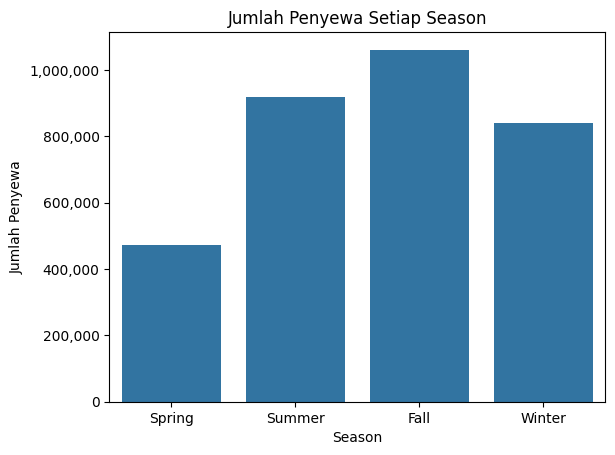

In [70]:
season_total = day_df.groupby(by="season").agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
})

sns.barplot(data=season_total, x="season", y="cnt", errorbar=None)
def format_func(value, tick_number):
    return f"{value:,.0f}"
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))

plt.title("Jumlah Penyewa Setiap Season")
plt.xlabel("Season")
plt.ylabel("Jumlah Penyewa")
plt.xticks([0,1,2,3],["Spring","Summer","Fall","Winter"])
plt.show()

### Pertanyaan 2:Bagaimana perbandingan penyewa sepeda ketika weekend/holiday dengan workingday?

In [71]:
day_df.groupby(by="workingday").agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum",
})

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


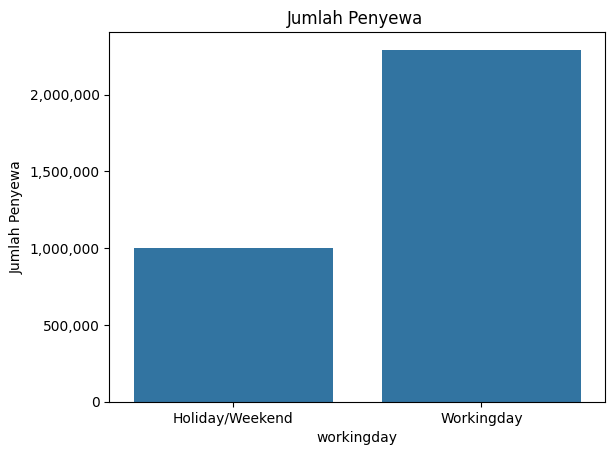

In [72]:
workingday_total = day_df.groupby(by="workingday").agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum",
})

sns.barplot(data=workingday_total, x=workingday_total.index, y="cnt", errorbar=None)
def format_func(value, tick_number):
    return f"{value:,.0f}"

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.title("Jumlah Penyewa ")
plt.ylabel("Jumlah Penyewa")
plt.xticks([0,1],["Holiday/Weekend","Workingday"])
plt.show()

**Insight:**
- Para penyewa lebih banyak menyewa sepeda di musim panas(2) dan musim gugur(3) ketimbang musim semi(1) dan musim gugur(4).
- Penyewa sepeda lebih banyak menyewa sepeda di workingday(1) ketimbang holiday/weekend(0)

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : </p>
  DIlihat dari grafik terdapat kenaikan jumlah penyewa sepeda di musim panas dan musim gugur dibandingkan musim  sebelumnya yaitu musim semi. Hal ini terjadi mungkin karena orang menghindari berada di luar ruangan lebih lama ketika musim panas dibandingkan musim semi. Pada musim dingin terjadi sedikit penurunan dibanding 2 musim sebelumnya. kondisi cuaca yang berubah dengan turunnya salju dan menjadi lebih dingin membuat penyewa mungkin lebih memilih alat transportasi lain ataupun mengurangi kegiatan diluar ruangan.
- Conclution pertanyaan 2 : </p>
  Dilihat dari grafik terdapat perbedaan yang jelas antara penyewa yang menyewa di workingday(1) dan di holiday/weekend(0). Hal ini menunjukkan bahwa jumlah penyewa di workingday dua kali lebih banyak dibandingkan holiday/weekend, menyewa sepeda mungkin membantu moblitas yang mereka lakukan di workingday.